In [1]:
from ipynb.fs.defs.Preprocessing_Module import read_data, add_topological, add_landcover, select_columns, reshape_dataset, fillna_dataset
from ipynb.fs.defs.Feature_Expansion_Module import feature_expansion
from ipynb.fs.defs.Initializer_Module import initializer
from ipynb.fs.defs.Neural_Network_Module import Dataset, transformations, FeedforwardNeuralNetModel, train_nn
from ipynb.fs.defs.Model_Validation_Module import validation_plots, metrics, eucleidian
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
# set the only_env as True if you want to use only environmental features
only_env = True
# set the name of the date column
date_col = 'dt_placement'
# set the model type. Could be 'class_regression' or 'mosquito_regression' or 'classification'
model_type = 'mosquito_regression'
# set the transform argument as True if you want to limit the target variable to 0-9 scale
transform_target = False
#set the data for embeddings e.g. data[['col', 'col2']]
embedded_data = None
#set the transformation actions of the data. Options are 'augmentation', 'normalization', 'log', 'scaling'
transformation_list = ['scaling']

In [3]:
data = read_data('../Datasets/Greece/GRE_culex_2011_2023.csv')
#=====================================================================
data = data[data.nuts2_name == 'CENTRAL MACEDONIA']
data = data.reset_index(drop=True)
#=====================================================================
columns = ['x', 'y', 'dt_placement',
           'culex spp.', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
           'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
           'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
           'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
           'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
           'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean' ]
names = ['x', 'y', 'dt_placement',
         'mosq_now', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
         'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
         'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
         'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
         'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
         'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean']
data = select_columns(data,columns,names)
data = add_topological(data,'../Datasets/Topological Datasets/2x2grid/greece_2km_geo.csv')
data = add_landcover(data,'../Datasets/Landcover Datasets/2x2grid/greece_2km_lulc.csv')
data = reshape_dataset(data,['x','y','dt_placement'])
data = fillna_dataset(data,{'acc_rainfall_1week':0, 'acc_rainfall_2week':0, 'acc_rainfall_jan':0})

Index(['trap_id', 'station_id', 'x', 'y', 'dt_placement', 'week', 'month',
       'year', 'country_code', 'nuts0_code', 'nuts0_name', 'nuts1_code',
       'nuts1_name', 'nuts2_code', 'nuts2_name', 'nuts3_code', 'nuts3_name',
       'lau1_municipality', 'lau2_settlement', 'trap_type', 'culex spp.',
       'region', 'dt_placement_original', 'indices_image_date', 'indices_lat',
       'indices_lon', 'ndvi', 'ndmi', 'ndwi', 'ndbi', 'ndvi_mean', 'ndmi_mean',
       'ndwi_mean', 'ndbi_mean', 'ndvi_std', 'ndmi_std', 'ndwi_std',
       'ndbi_std', 'lst_image_date', 'lst_lat', 'lst_lon', 'lst_day',
       'lst_night', 'monthly_lst_lat', 'monthly_lst_lon', 'lst_jan_day_mean',
       'lst_jan_night_mean', 'lst_feb_day_mean', 'lst_feb_night_mean',
       'lst_mar_day_mean', 'lst_mar_night_mean', 'lst_apr_day_mean',
       'lst_apr_night_mean', 'indices_image_date.1', 'indices_lat.1',
       'indices_lon.1', 'acc_rainfall_jan', 'dt_placement_minus_7',
       'dt_placement_minus_14', 'dt_placement_m

In [4]:
data = feature_expansion(data, env=only_env)

In [5]:
data = initializer(data, model_type, dropna=True)

In [6]:
#Operational Split
test = data[(data['dt_placement']>pd.to_datetime('2021-01-01', format="%Y-%m-%d")) & (data['dt_placement']<pd.to_datetime('2022-01-01', format="%Y-%m-%d"))].reset_index(drop=True)
train = data[(data['dt_placement']<pd.to_datetime('2021-01-01', format="%Y-%m-%d"))].reset_index(drop=True)
data

,x,y,dt_placement,ndvi,ndwi,ndmi,ndbi,ndvi_mean,ndvi_std,ndwi_mean,...,landcover,null_island_distance,vert_distance,days_distance,mo_sin,mo_cos,year,lst,summer_days_month,mosq_now
0,22.051420,40.803618,2018-08-23,0.298064,-0.322957,-0.003767,0.003767,0.421377,0.153513,-0.405053,...,13.0,5053.370026,4537.155310,235,-8.660254e-01,-5.000000e-01,2018,27.71,0,0.0
1,22.105360,40.689983,2023-08-15,0.379634,-0.378914,0.062324,-0.062324,0.454974,0.081171,-0.416460,...,31.0,5045.036244,4524.519675,227,-8.660254e-01,-5.000000e-01,2023,26.38,0,8.0
2,22.129853,40.631686,2018-09-13,0.348061,-0.355022,0.000954,-0.000954,0.481525,0.171268,-0.435398,...,12.0,5040.629508,4518.037344,256,-1.000000e+00,-1.836970e-16,2018,22.73,0,26.0
3,22.134713,40.688795,2018-08-06,0.292376,-0.306234,-0.044335,0.044335,0.478885,0.082697,-0.427395,...,9.0,5046.233489,4524.387575,218,-8.660254e-01,-5.000000e-01,2018,27.46,0,65.0
4,22.134713,40.688795,2019-08-22,0.262689,-0.298701,-0.055381,0.055381,0.445116,0.080352,-0.419596,...,9.0,5046.233489,4524.387575,234,-8.660254e-01,-5.000000e-01,2019,29.01,0,572.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8004,23.877965,40.391582,2016-06-07,0.563515,-0.484344,0.258921,-0.258921,0.505959,0.093950,-0.449757,...,10.0,5099.123183,4491.338998,158,1.224647e-16,-1.000000e+00,2016,23.67,0,30.0
8005,23.877965,40.391582,2016-06-21,0.563515,-0.484344,0.258921,-0.258921,0.505959,0.093950,-0.449757,...,10.0,5099.123183,4491.338998,172,1.224647e-16,-1.000000e+00,2016,30.56,1,36.0
8006,23.877965,40.391582,2016-07-05,0.419864,-0.413709,0.056917,-0.056917,0.385350,0.082092,-0.392306,...,10.0,5099.123183,4491.338998,186,-5.000000e-01,-8.660254e-01,2016,24.24,1,22.0
8007,23.877965,40.391582,2016-07-19,0.419864,-0.413709,0.056917,-0.056917,0.385350,0.082092,-0.392306,...,10.0,5099.123183,4491.338998,200,-5.000000e-01,-8.660254e-01,2016,29.26,1,42.0


In [7]:
#define a nn 
model = FeedforwardNeuralNetModel(num_features = len(train.iloc[0,:])-2, num_class=1, encode_layers = [256,128,128,64,32],
                                  decode_layers = None, latent_dim = 5, dropout=[0.3,0.3,0.3,0.1,0.0],
                                  model_type = model_type, learning_rate = 0.001, epochs = 70, batch_size = 128,
                                  transformation_list = transformation_list, early_stop = None)

# model = FeedforwardNeuralNetModel(num_features=len(train.iloc[0,:])-2, num_class=1, encode_layers = [512,360,256,128,64],
#                                   decode_layers = [64,128,256,360,512], latent_dim=10, dropout=[0.3,0.3,0.1,0.1,0.0],
#                                   model_type=model_type, learning_rate = 0.001, epochs = 50, batch_size = 128,
#                                   transformation_list = transformation_list, early_stop = None)

In [8]:
#preprocess nn input
del train[date_col]
date = test[date_col]
del test[date_col]

train_X, train_y, test_X, test_y = transformations(train, test = test, model_type = model.model_type, 
                                                   embedding_data = model.embedding_data,
                                                   transformation_list = model.transformation_list)

training_set = Dataset(train_X, train_y)
testing_set = Dataset(test_X, test_y)

Epoch 001: | Train Loss: 202487.80801 | Val Loss: 120397.56250 | Train Acc: 275.146| Val Acc: 139.352
Epoch 002: | Train Loss: 201803.06533 | Val Loss: 120031.64535 | Train Acc: 274.291| Val Acc: 138.744
Epoch 003: | Train Loss: 199999.48537 | Val Loss: 119048.17367 | Train Acc: 272.034| Val Acc: 137.225
Epoch 004: | Train Loss: 195733.14129 | Val Loss: 116848.96289 | Train Acc: 266.395| Val Acc: 134.829
Epoch 005: | Train Loss: 189945.10638 | Val Loss: 117911.85482 | Train Acc: 258.744| Val Acc: 133.655
Epoch 006: | Train Loss: 183496.73803 | Val Loss: 117871.52832 | Train Acc: 251.277| Val Acc: 135.351
Epoch 007: | Train Loss: 177295.10971 | Val Loss: 117040.53288 | Train Acc: 243.791| Val Acc: 133.708
Epoch 008: | Train Loss: 172434.44149 | Val Loss: 115529.74414 | Train Acc: 239.356| Val Acc: 133.949
Epoch 009: | Train Loss: 163335.00299 | Val Loss: 113511.79313 | Train Acc: 230.087| Val Acc: 140.776
Epoch 010: | Train Loss: 157683.99535 | Val Loss: 109776.94189 | Train Acc: 223.19

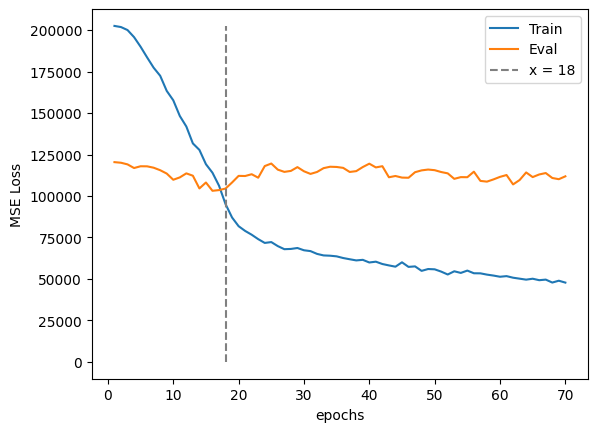

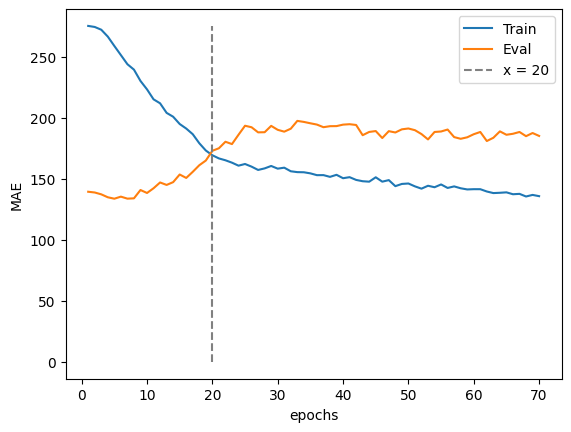

In [9]:
#train_nn
results_train, results_test, latent_train, latent_test, _ = train_nn(model = model, train_set = training_set,
                                                                     test_set = testing_set, features=None,
                                                                     max_val = train_y.max())

MAE on train set:  122.28108108108108
min prediction: 4
max prediction: 1284

MAE on test set:  185.48143053645117
Error <= 30: 19.53 %
min prediction: 4
max prediction: 1084


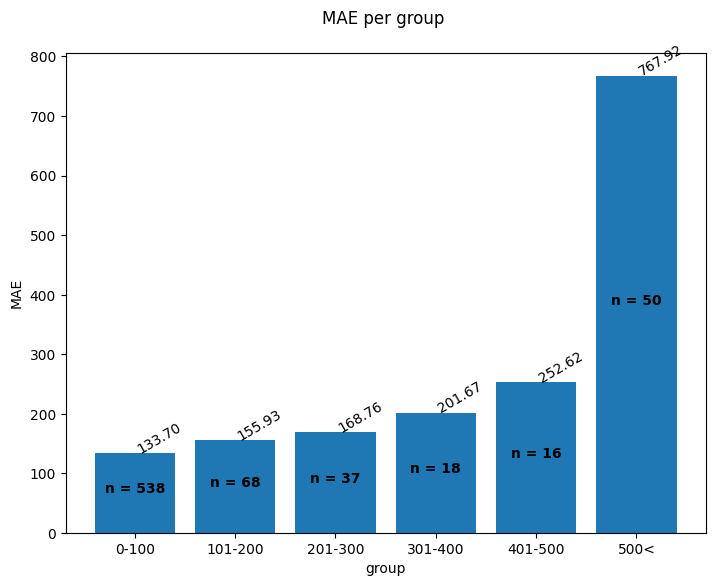

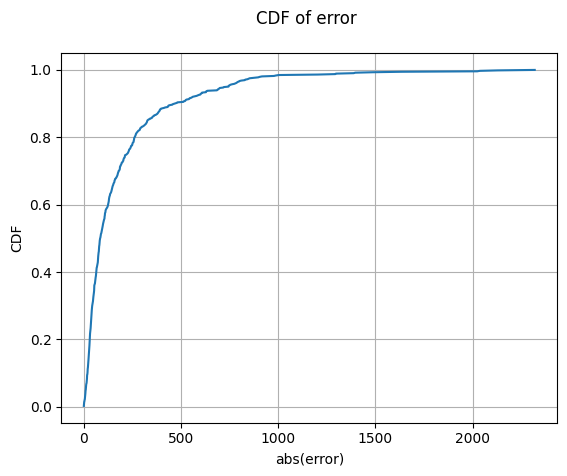

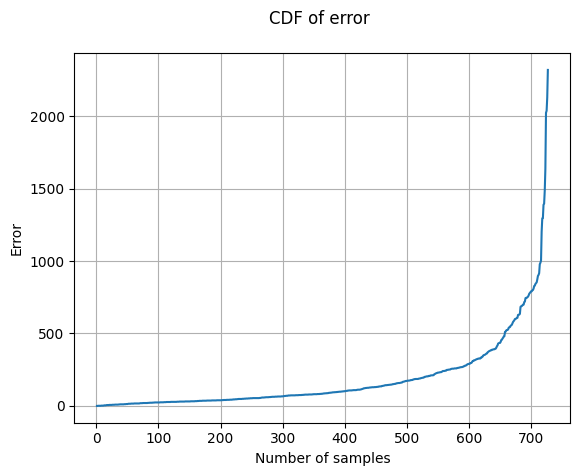

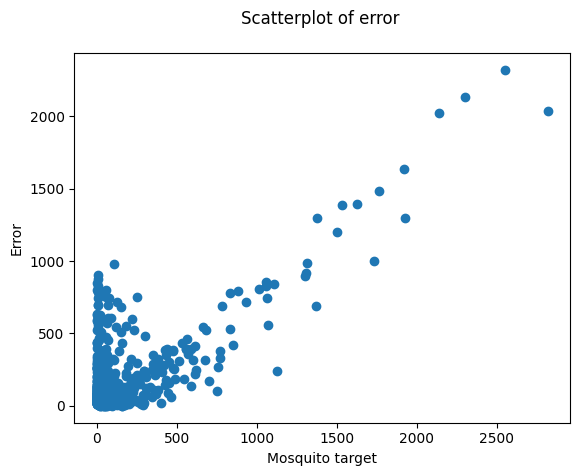

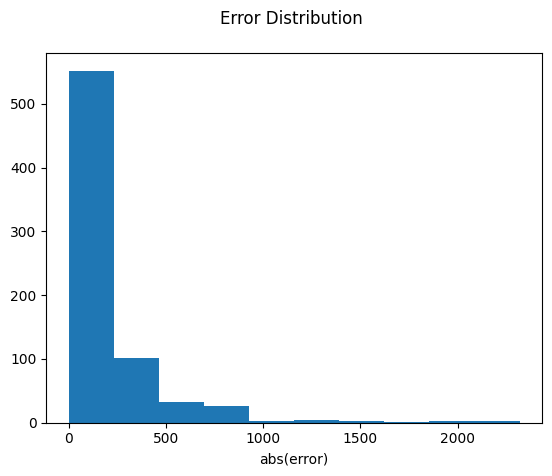

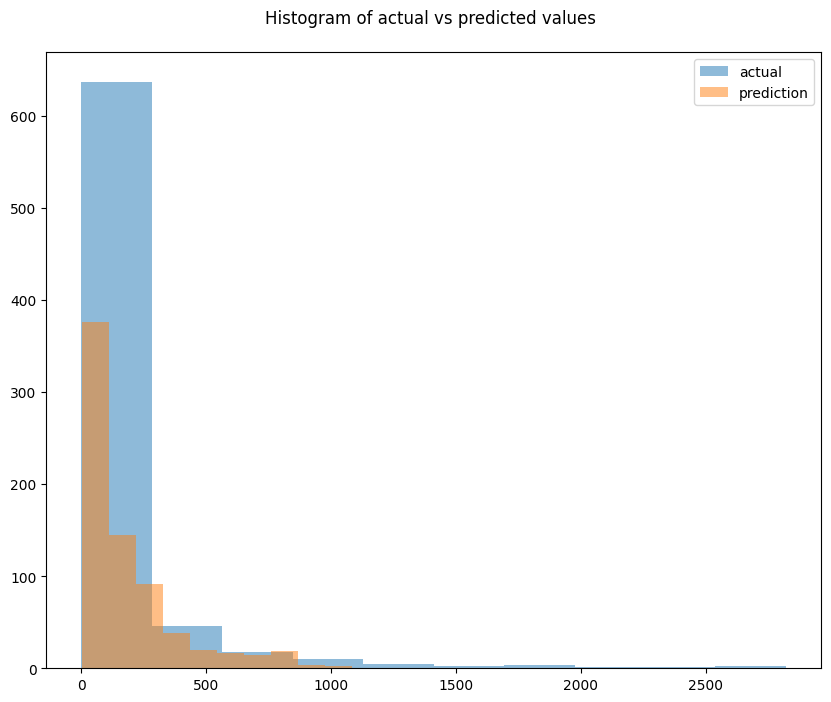

In [10]:
results_test[date_col] = date
results_test['dt_prediction'] = results_test[date_col] + datetime.timedelta(days=15)
results_test['error'] = results_test['actual'] - results_test['prediction']
results_test['abs(error)'] = np.abs(results_test['actual'] - results_test['prediction'])

if model_type == 'mosquito_regression':
    metrics(results_train, results_test, threshold=30)
else:
    metrics(results_train, results_test)
validation_plots(results_test,model_type)

In [11]:
results_train['error'] = results_train['actual'] - results_train['prediction']
results_train['abs(error)'] = np.abs(results_train['actual'] - results_train['prediction'])
results_train = pd.concat([results_train, pd.DataFrame(latent_train)],axis=1)
results_train

,actual,prediction,error,abs(error),0,1,2,3,4
0,81.0,181,-100.0,100.0,-0.761094,24.163170,21.409735,25.644051,23.760883
1,137.0,59,78.0,78.0,-0.407286,9.292908,7.921381,9.364674,8.247880
2,28.0,89,-61.0,61.0,-0.319543,13.780517,12.135113,14.338562,12.123961
3,345.0,204,141.0,141.0,-1.096827,28.808258,25.357046,30.374073,28.392344
4,244.0,88,156.0,156.0,-0.302524,12.136635,10.946237,13.505978,11.679248
...,...,...,...,...,...,...,...,...,...
5915,243.0,423,-180.0,180.0,-0.584402,59.233082,53.194290,63.177406,59.661488
5916,332.0,326,6.0,6.0,-1.080825,42.214783,38.222984,45.466827,43.283173
5917,1061.0,990,71.0,71.0,-1.321156,134.675095,122.687057,149.233505,136.164490
5918,129.0,181,-52.0,52.0,-1.035143,24.775370,21.637947,25.873434,24.306784


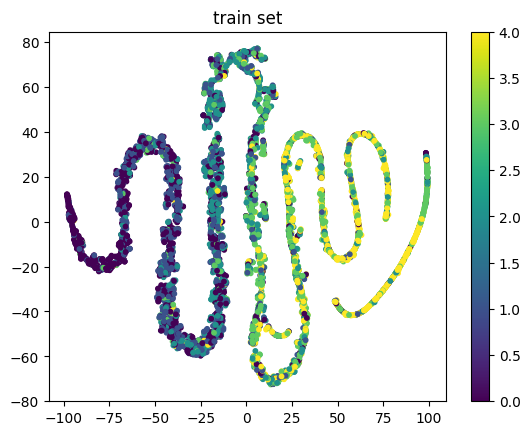

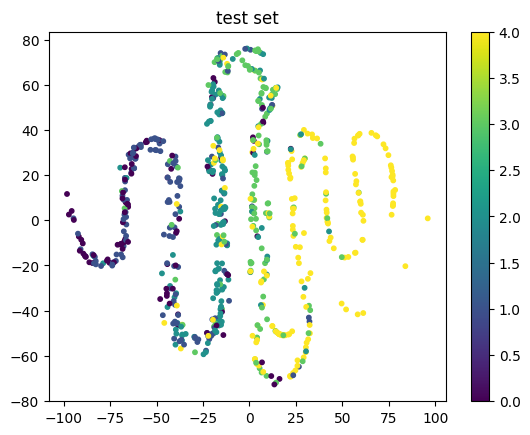

In [12]:
q=5
bins, bounds = pd.qcut(pd.concat([results_train['abs(error)'],results_test['abs(error)']]), retbins=True, q=q, duplicates='drop')

# q=[-1, 5, 10, 20, 50, 100, 200, 300, 400, 500, 600]
# bins, bounds = pd.cut(pd.concat([results_train['abs(error)'],results_test['abs(error)']]), bins=q, retbins=True, labels=classes)

bins = bins.cat.codes
latent = np.concatenate((latent_train, latent_test))
colour_dots = pd.concat([results_train['abs(error)'], results_test['abs(error)']])
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(latent)
X1_tsne = X_tsne[:latent_train.shape[0],:]
X2_tsne = X_tsne[latent_train.shape[0]:,:]

# Visualize the t-SNE result
plt.scatter(X1_tsne[:, 0], X1_tsne[:, 1], c=bins[:latent_train.shape[0]], s=10)
plt.colorbar()
plt.title('train set')
plt.show()

plt.scatter(X2_tsne[:, 0], X2_tsne[:, 1], c=bins[latent_train.shape[0]:], s=10)
plt.colorbar()
plt.title('test set')
plt.show()

In [13]:
#keep only train observations with error less than MAE
results_good = results_train.loc[results_train['abs(error)']<results_train['abs(error)'].mean(), 0:].reset_index(drop=True)
results_good

,0,1,2,3,4
0,-0.761094,24.163170,21.409735,25.644051,23.760883
1,-0.407286,9.292908,7.921381,9.364674,8.247880
2,-0.319543,13.780517,12.135113,14.338562,12.123961
3,0.021175,14.297297,13.090354,17.093454,14.363789
4,-0.226272,16.443113,14.756761,17.987200,16.826754
...,...,...,...,...,...
3884,-0.774132,64.698746,58.764038,70.959290,64.993004
3885,-1.080825,42.214783,38.222984,45.466827,43.283173
3886,-1.321156,134.675095,122.687057,149.233505,136.164490
3887,-1.035143,24.775370,21.637947,25.873434,24.306784


In [14]:
percentage = 0.2

In [16]:
euc_M_dist = eucleidian(np.array(results_good), latent_test, 3)
results_test['dist'] = euc_M_dist
results_test_latent = results_test.sort_values(by=['dist','abs(error)']).reset_index(drop=True)
print('correlation:', results_test_latent.corr().loc['abs(error)','dist'])
print("good:", results_test_latent.iloc[:round(len(results_test_latent)*percentage)]['abs(error)'].mean())
print("bad:", results_test_latent.iloc[-round(len(results_test_latent)*percentage):]['abs(error)'].mean())

correlation: 0.31756092748182324
good: 35.42758620689655
bad: 351.4


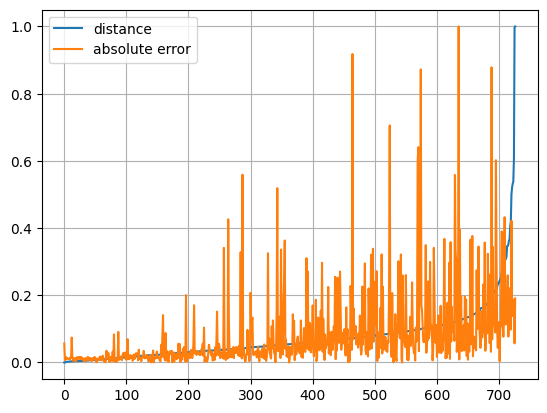

In [17]:
distance = (results_test_latent['dist'] - results_test_latent['dist'].min())/(results_test_latent['dist'].max()-results_test_latent['dist'].min())
error=(results_test_latent['abs(error)']-results_test_latent['abs(error)'].min())/(results_test_latent['abs(error)'].max()-results_test_latent['abs(error)'].min())
plt.plot(distance, label='distance')
plt.plot(error, label='absolute error')
plt.legend()
plt.grid()
plt.show()

In [18]:
results_good = results_train.loc[results_train['abs(error)']<results_train['abs(error)'].mean()].index
results_good = train_X[0][results_good,:]

euc_M_dist = eucleidian(results_good, test_X[0], 3)
results_test['dist'] = euc_M_dist
results_test.corr()
results_test_fs = results_test.sort_values(by=['dist','abs(error)']).reset_index(drop=True)
print('correlation:', results_test_fs.corr().loc['abs(error)','dist'])
print("good:", results_test_fs.iloc[:round(len(results_test_fs)*percentage)][ 'abs(error)'].mean())
print("bad:", results_test_fs.iloc[-round(len(results_test_fs)*percentage):]['abs(error)'].mean())

correlation: 0.13369516796449668
good: 98.51724137931035
bad: 240.31034482758622


In [19]:
results_good = results_train.loc[results_train['abs(error)']<results_train['abs(error)'].mean()].index
results_good = train.loc[results_good,['x','y']]

euc_M_dist = eucleidian(np.array(results_good.drop_duplicates().reset_index(drop=True)), np.array(test[['x','y']]), 3)
results_test['dist'] = euc_M_dist
results_test.corr()
results_test_coord = results_test.sort_values(by=['dist','abs(error)']).reset_index(drop=True)
print('correlation:', results_test_coord.corr().loc['abs(error)','dist'])
print("good:", results_test_coord.iloc[:round(len(results_test_coord)*percentage)]['abs(error)'].mean())
print("bad:", results_test_coord.iloc[-round(len(results_test_coord)*percentage):]['abs(error)'].mean())

correlation: -0.131757609497122
good: 136.53793103448277
bad: 78.44137931034483
